In [15]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [16]:
import plotly.express as px
import pandas as pd

In [17]:
f = px.data.election()
geojson = pd.read_json("combined_diseases.json")

fig = px.scatter_geo(
    geojson,
    lat="lat",
    lon="lng",
    template="plotly_dark",
    size="malaria",  # size of markers
    projection="natural earth",
)

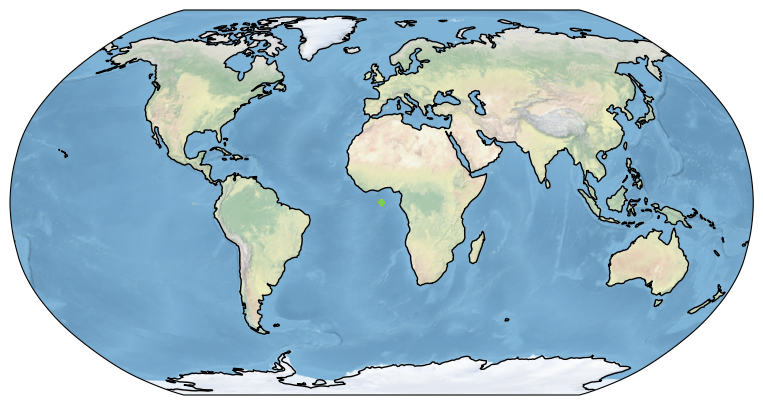

In [18]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import geopandas as gpd

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
geojson = pd.read_json("combined_diseases.json")
geometry = gpd.points_from_xy(geojson["lng"], geojson["lat"])
gdf = gpd.GeoDataFrame(geojson, geometry=geometry, crs=4326)

gdf.plot(
    ax=ax,
    column="malaria",
    markersize="malaria",
)

plt.show()

In [20]:
gdf.head(3)
gdf.explore(column="dengue")
# gdf.explore()